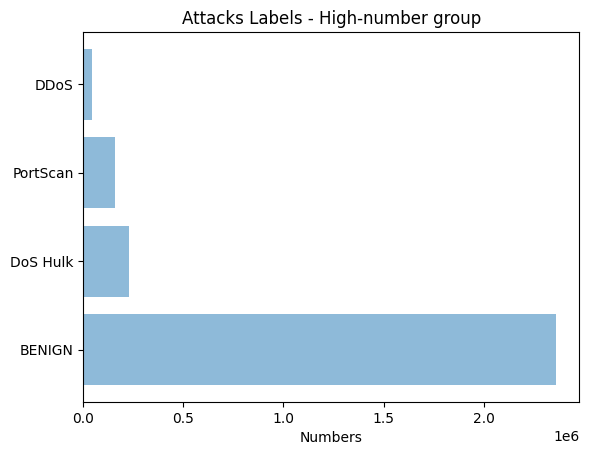

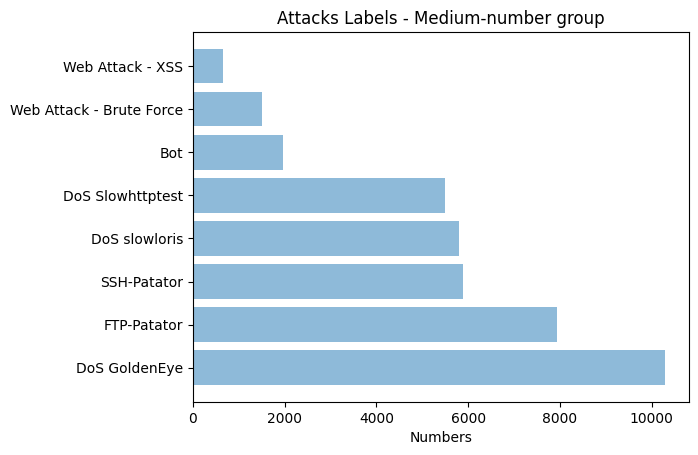

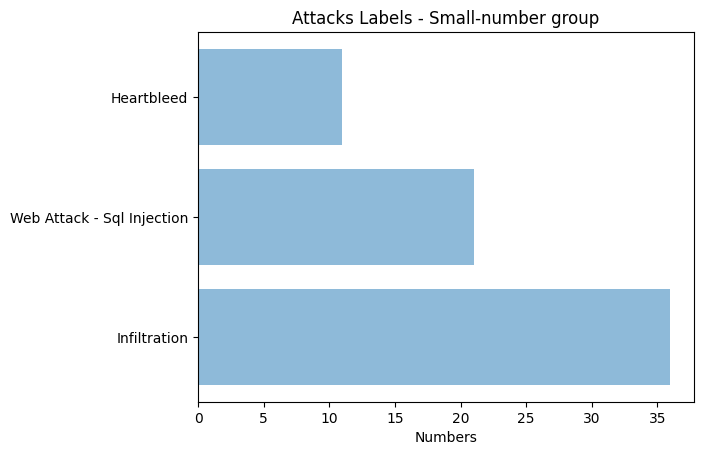

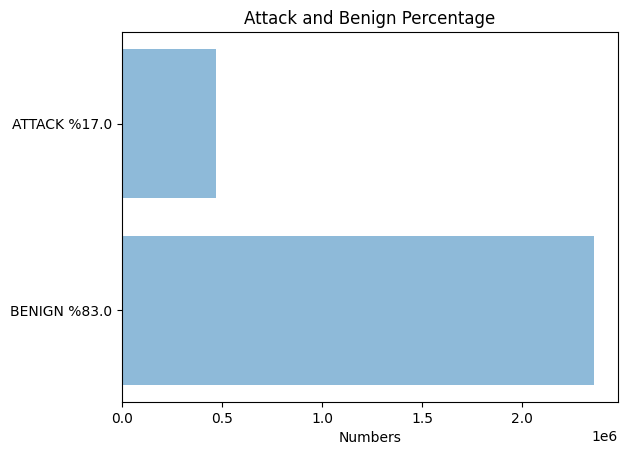

Mission accomplished!
Total operation time: = 6.684107065200806 seconds


In [1]:



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

seconds = time.time()

# Function to create a horizontal bar graph
def create_bar_graph(objects, performance, x_label, y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()

# Read data from CSV file
df = pd.read_csv('all_data.csv', usecols=["Label"])

# Count occurrences of each label
label_counts = df.iloc[:, 0].value_counts()

# Initialize variables to store label counts
big_labels = []
big_values = []
medium_labels = []
medium_values = []
small_labels = []
small_values = []
attack_count = 0
benign_count = 0

# Group labels based on counts
for label, count in label_counts.items():
    if count > 11000:
        big_labels.append(str(label))
        big_values.append(count)
    elif count < 600:
        small_labels.append(str(label))
        small_values.append(count)
    else:
        medium_labels.append(str(label))
        medium_values.append(count)

    if str(label) == "BENIGN":
        benign_count += count
    else:
        attack_count += count

# Calculate percentages of attack and benign labels
total_samples = benign_count + attack_count
percent_benign = round(benign_count / total_samples, 2) * 100
percent_attack = round(attack_count / total_samples, 2) * 100
labels = ["BENIGN %" + str(percent_benign), "ATTACK %" + str(percent_attack)]

# Create bar graphs
create_bar_graph(big_labels, big_values, "Numbers", "Attacks Labels - High-number group")
create_bar_graph(medium_labels, medium_values, "Numbers", "Attacks Labels - Medium-number group")
create_bar_graph(small_labels, small_values, "Numbers", "Attacks Labels - Small-number group")
create_bar_graph(labels, [benign_count, attack_count], "Numbers", "Attack and Benign Percentage")

print("Mission accomplished!")
print("Total operation time: =", time.time() - seconds, "seconds")